<a href="https://colab.research.google.com/github/nura6199/my-dissertation/blob/main/CDKImprovedDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, confusion_matrix,
    recall_score, precision_score, RocCurveDisplay, mean_squared_error
)
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import joblib

In [71]:
#Load Dataset
path = '/content/drive/MyDrive/AI/Tugas 2/Chronic_Kidney_Dsease_data.csv'
df = pd.read_csv(path)
df.drop(columns=['PatientID','DoctorInCharge'], errors='ignore', inplace=True)


In [72]:
class_counts = df['Diagnosis'].value_counts()
class_counts

,count
Diagnosis,
1,1524
0,135


,count
Diagnosis,
1,1524
0,135


Class Distribution:
Diagnosis
1    1524
0     135
Name: count, dtype: int64


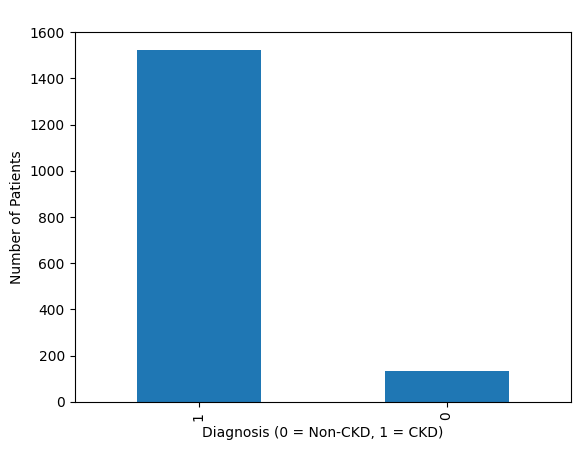

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Count class distribution
class_counts = df['Diagnosis'].value_counts()

# Print counts
print("Class Distribution:")
print(class_counts)

# Plot distribution
plt.figure()
class_counts.plot(kind='bar')
plt.xlabel('Diagnosis (0 = Non-CKD, 1 = CKD)')
plt.ylabel('Number of Patients')
plt.title(' ')
plt.show()


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1659 non-null   int64  
 1   Gender                         1659 non-null   int64  
 2   Ethnicity                      1659 non-null   int64  
 3   SocioeconomicStatus            1659 non-null   int64  
 4   EducationLevel                 1659 non-null   int64  
 5   BMI                            1659 non-null   float64
 6   Smoking                        1659 non-null   int64  
 7   AlcoholConsumption             1659 non-null   float64
 8   PhysicalActivity               1659 non-null   float64
 9   DietQuality                    1659 non-null   float64
 10  SleepQuality                   1659 non-null   float64
 11  FamilyHistoryKidneyDisease     1659 non-null   int64  
 12  FamilyHistoryHypertension      1659 non-null   i

In [75]:
df.head()

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,...,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1
1,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,...,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1
2,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,...,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1
3,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,...,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1
4,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,...,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1


,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,...,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1
1,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,...,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1
2,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,...,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1
3,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,...,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1
4,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,...,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1


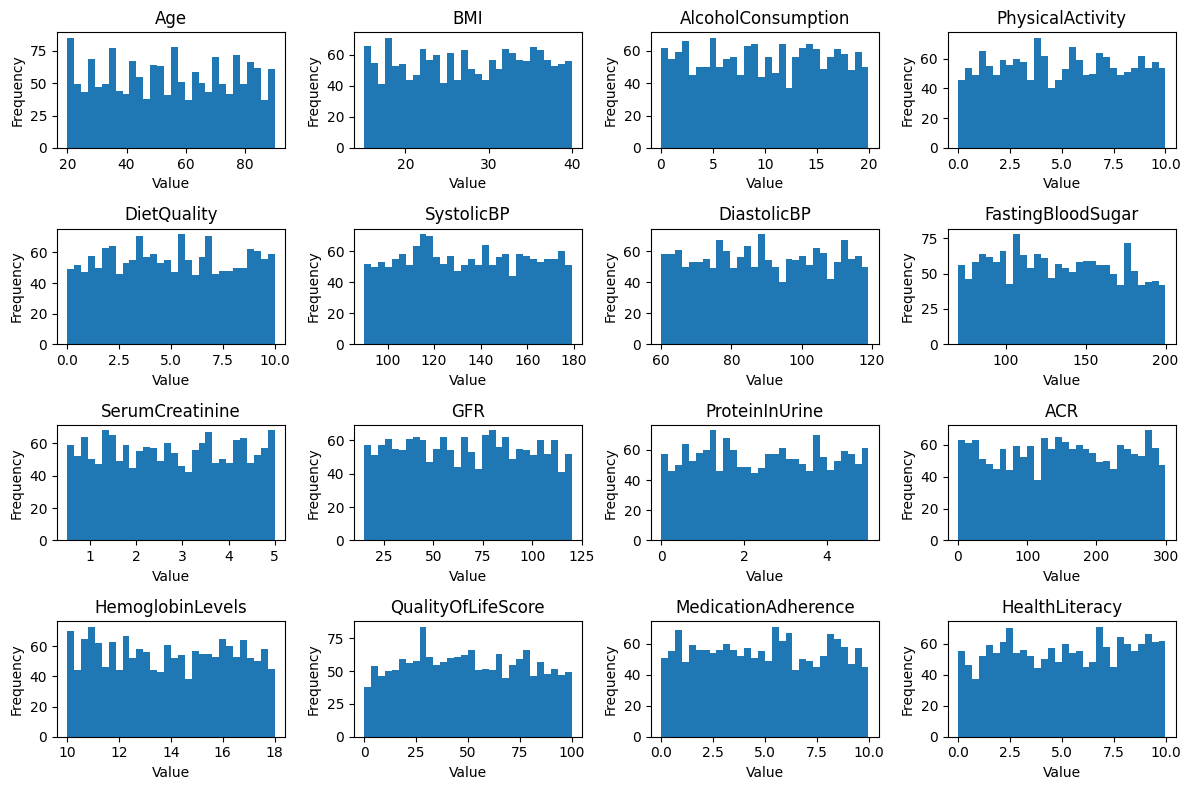

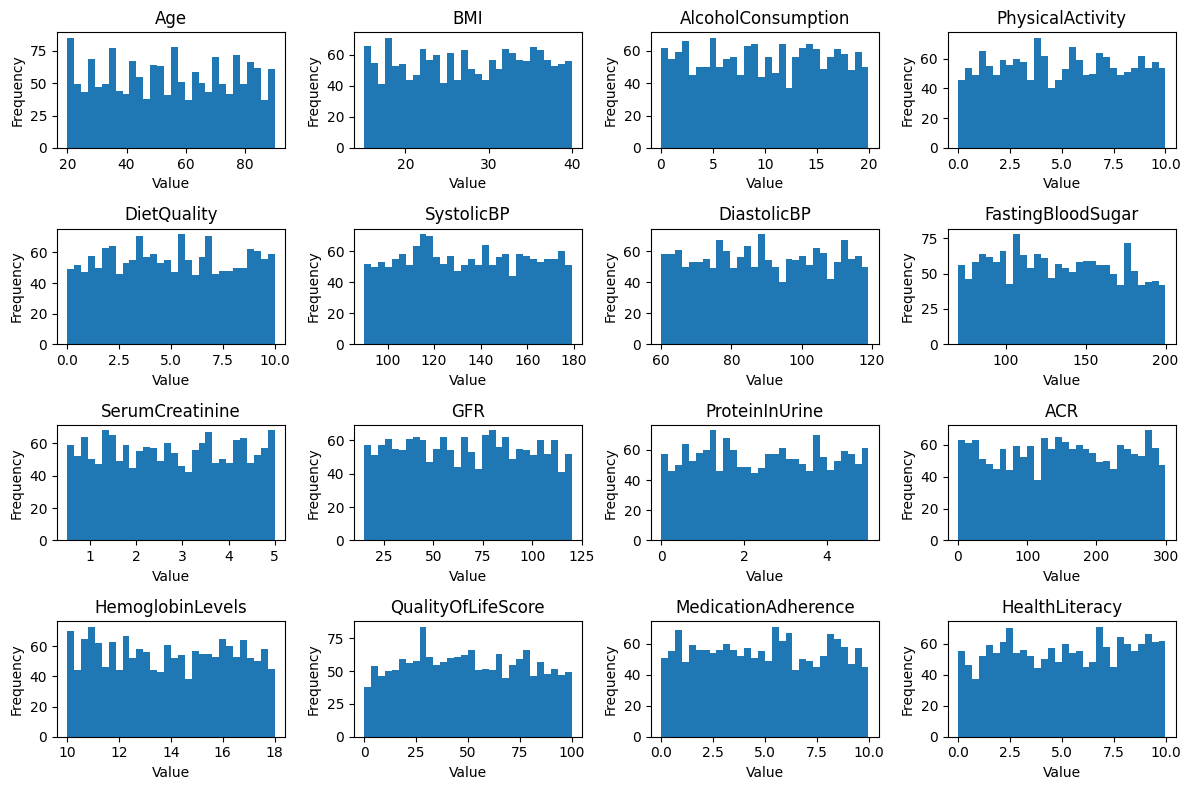

In [76]:
import pandas as pd
import matplotlib.pyplot as plt



# Selected key numerical and lifestyle features for distribution analysis
features = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity',
    'DietQuality', 'SystolicBP', 'DiastolicBP',
    'FastingBloodSugar', 'SerumCreatinine', 'GFR',
    'ProteinInUrine', 'ACR',
    'HemoglobinLevels', 'QualityOfLifeScore',
    'MedicationAdherence', 'HealthLiteracy'
]

# Plot feature distributions
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 4, i)
    plt.hist(df[feature], bins=30)
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




In [77]:
#Preprocessing
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

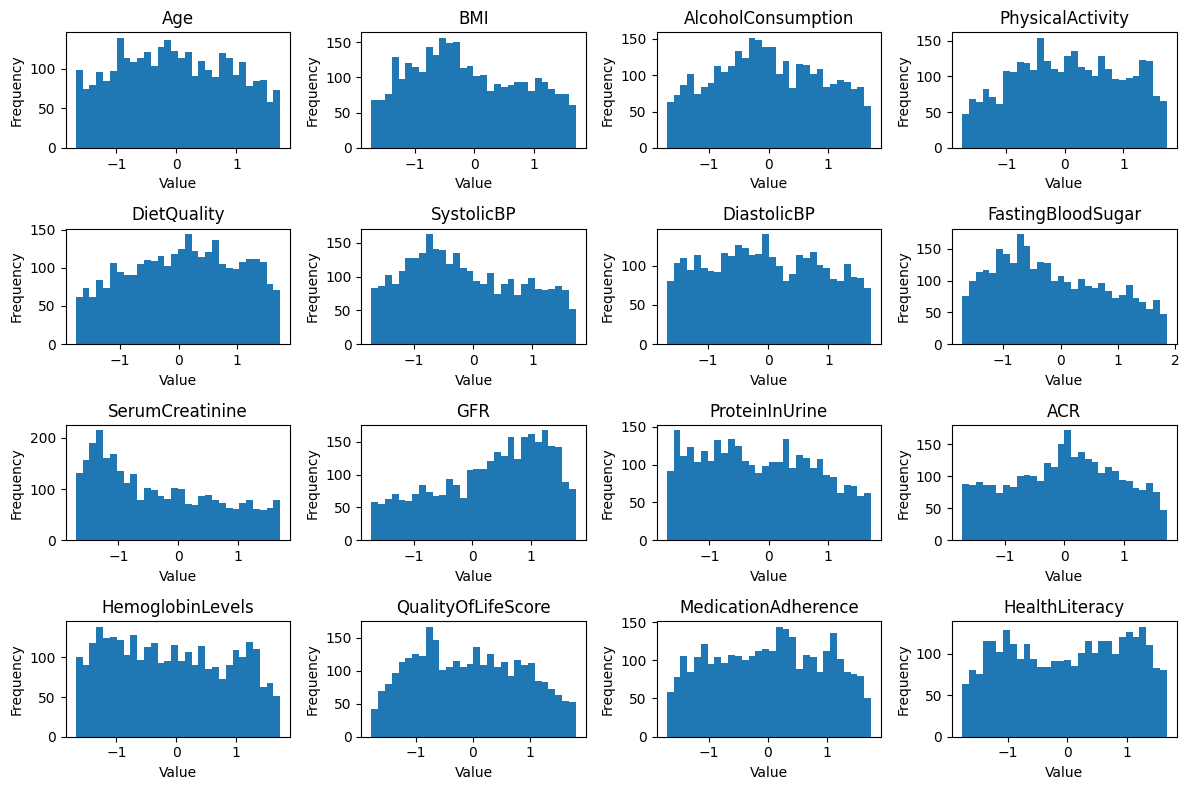

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert SMOTE output to DataFrame
df_smote = pd.DataFrame(X_res, columns=X.columns)
df_smote['Diagnosis'] = y_res

# Selected key numerical and lifestyle features for distribution analysis
features = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity',
    'DietQuality', 'SystolicBP', 'DiastolicBP',
    'FastingBloodSugar', 'SerumCreatinine', 'GFR',
    'ProteinInUrine', 'ACR',
    'HemoglobinLevels', 'QualityOfLifeScore',
    'MedicationAdherence', 'HealthLiteracy'
]

# Plot feature distributions after SMOTE
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 4, i)
    plt.hist(df_smote[feature], bins=30)
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Class Distribution After SMOTE:
Diagnosis
1    1524
0    1524
Name: count, dtype: int64

Percentage Distribution After SMOTE:
Diagnosis
1    50.0
0    50.0
Name: count, dtype: float64


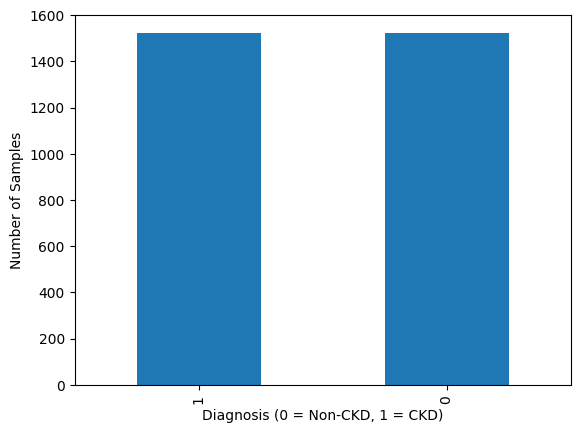

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert resampled data to DataFrame for easy handling
df_resampled = pd.DataFrame(X_res)
df_resampled['Diagnosis'] = y_res

# Count class distribution after SMOTE
class_counts_smote = df_resampled['Diagnosis'].value_counts()

# Print counts
print("Class Distribution After SMOTE:")
print(class_counts_smote)

# Print percentage distribution
print("\nPercentage Distribution After SMOTE:")
print((class_counts_smote / class_counts_smote.sum()) * 100)

# Plot distribution
plt.figure()
class_counts_smote.plot(kind='bar')
plt.xlabel('Diagnosis (0 = Non-CKD, 1 = CKD)')
plt.ylabel('Number of Samples')
plt.title('')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert resampled data to DataFrame for easy handling
df_resampled = pd.DataFrame(X_res)
df_resampled['Diagnosis'] = y_res

# Count class distribution after SMOTE
class_counts_smote = df_resampled['Diagnosis'].value_counts()

# Print counts
print("Class Distribution After SMOTE:")
print(class_counts_smote)

# Print percentage distribution
print("\nPercentage Distribution After SMOTE:")
print((class_counts_smote / class_counts_smote.sum()) * 100)

# Plot distribution
plt.figure()
class_counts_smote.plot(kind='bar')
plt.xlabel('Diagnosis (0 = Non-CKD, 1 = CKD)')
plt.ylabel('Number of Samples')
plt.title('Class Distribution After SMOTE')
plt.show()


In [78]:
# Split Data (70:30)
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)


In [79]:
# Train Classical ML Models
rf = RandomForestClassifier(n_estimators=200, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
svm = SVC(probability=True, kernel='rbf', random_state=42)

models = {'Random Forest': rf, 'XGBoost': xgb, 'SVM': svm}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)[:,1]
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, preds),
        'F1-Score': f1_score(y_test, preds),
        'AUC': roc_auc_score(y_test, proba),
        'RMSE': rmse
    })

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:25:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:27:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [80]:
# Results Table
results_df = pd.DataFrame(results)
print(results_df)

           Model  Accuracy  F1-Score       AUC      RMSE
0  Random Forest  0.982514  0.982495  0.998858  0.132236
1        XGBoost  0.975956  0.975877  0.997310  0.155060
2            SVM  0.987978  0.987899  0.999532  0.109644
           Model  Accuracy  F1-Score       AUC      RMSE
0  Random Forest  0.982514  0.982495  0.998858  0.132236
1        XGBoost  0.975956  0.975877  0.997310  0.155060
2            SVM  0.987978  0.987899  0.999532  0.109644


Confusion Matrices (RF, XGBoost, SVM)

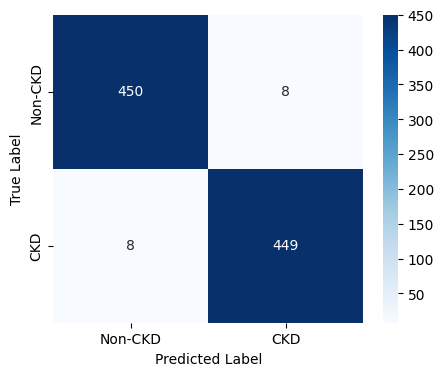

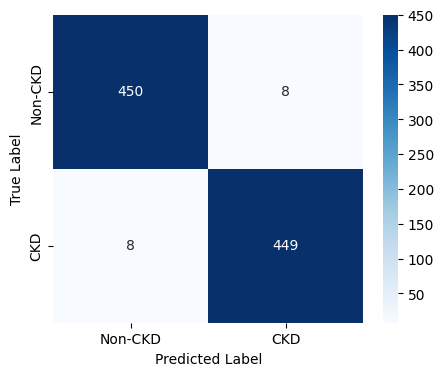

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict
rf_preds = rf.predict(X_test)

# Confusion matrix
cm_rf = confusion_matrix(y_test, rf_preds)

# Plot
plt.figure(figsize=(5,4))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Non-CKD", "CKD"],
    yticklabels=["Non-CKD", "CKD"]
)
#plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


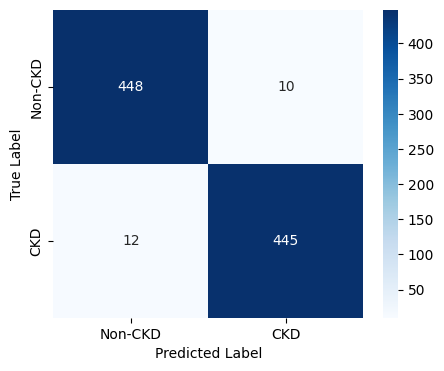

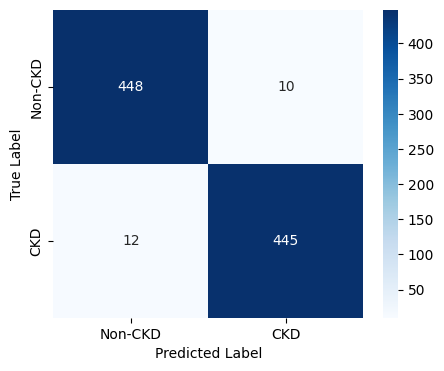

In [82]:
# Predict
xgb_preds = xgb.predict(X_test)

# Confusion matrix
cm_xgb = confusion_matrix(y_test, xgb_preds)

# Plot
plt.figure(figsize=(5,4))
sns.heatmap(
    cm_xgb,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Non-CKD", "CKD"],
    yticklabels=["Non-CKD", "CKD"]
)
# plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


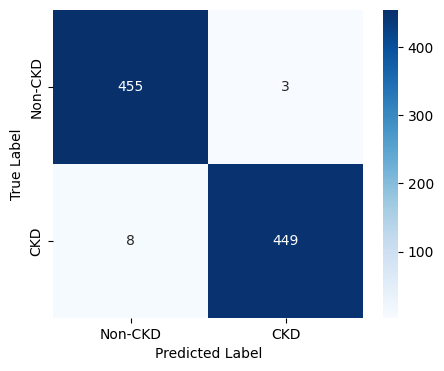

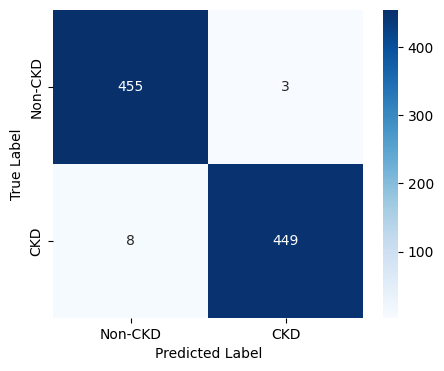

In [83]:
# Predict
svm_preds = svm.predict(X_test)

# Confusion matrix
cm_svm = confusion_matrix(y_test, svm_preds)

# Plot
plt.figure(figsize=(5,4))
sns.heatmap(
    cm_svm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Non-CKD", "CKD"],
    yticklabels=["Non-CKD", "CKD"]
)
#plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [84]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(model, title):
    train_sizes, train_scores, val_scores = learning_curve(
        model,
        X_train,
        y_train,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )

    train_error = 1 - np.mean(train_scores, axis=1)
    val_error = 1 - np.mean(val_scores, axis=1)

    plt.figure(figsize=(5,3))
    plt.plot(train_sizes, train_error, label='Training Error')
    plt.plot(train_sizes, val_error, label='Validation Error')
    plt.title(title)
    plt.xlabel('Training Samples')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()


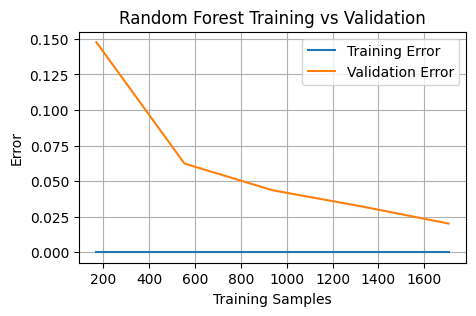

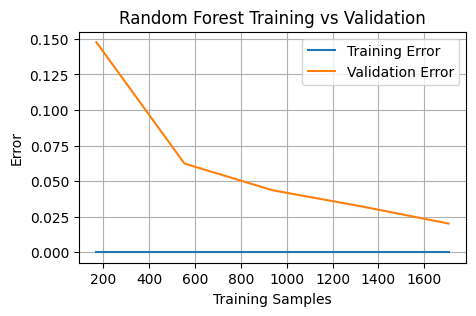

In [85]:
plot_learning_curve(rf, "Random Forest Training vs Validation")


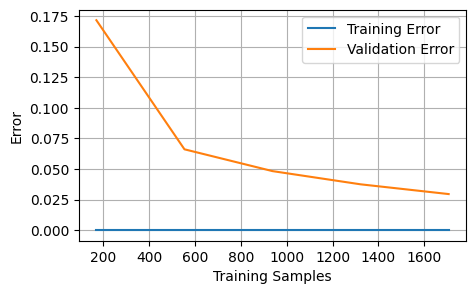

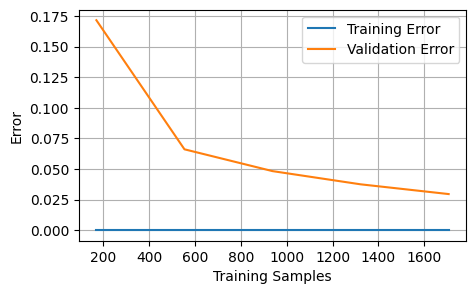

In [86]:
plot_learning_curve(xgb, "")


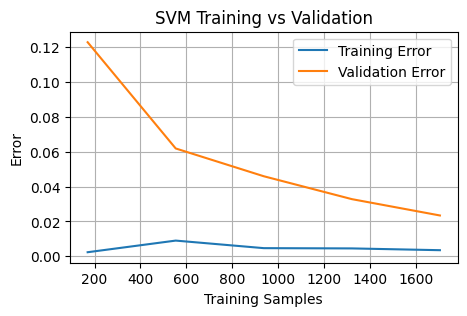

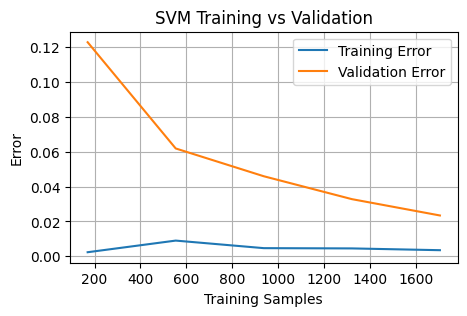

In [87]:
plot_learning_curve(svm, "SVM Training vs Validation")


In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define and train the Deep Learning model
dnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

history = dnn_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - AUC: 0.6431 - accuracy: 0.5746 - loss: 0.6829 - val_AUC: 0.8543 - val_accuracy: 0.7564 - val_loss: 0.5650
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.8518 - accuracy: 0.7810 - loss: 0.5267 - val_AUC: 0.9146 - val_accuracy: 0.8173 - val_loss: 0.4297
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.8823 - accuracy: 0.8091 - loss: 0.4413 - val_AUC: 0.9350 - val_accuracy: 0.8478 - val_loss: 0.3553
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9255 - accuracy: 0.8557 - loss: 0.3575 - val_AUC: 0.9452 - val_accuracy: 0.8689 - val_loss: 0.3144
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9422 - accuracy: 0.8784 - loss: 0.3147 - val_AUC: 0.9532 - val_accuracy: 0.8829 - val_loss: 0.2877
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9471 - accuracy: 0.8854 - loss: 0.2964 - val_AUC: 0.9622 - val_accuracy: 0.8899 - val_loss: 0.2594
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.958

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - AUC: 0.5830 - accuracy: 0.5643 - loss: 0.7086 - val_AUC: 0.8347 - val_accuracy: 0.7518 - val_loss: 0.5498
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8111 - accuracy: 0.7271 - loss: 0.5402 - val_AUC: 0.9039 - val_accuracy: 0.8197 - val_loss: 0.4351
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8903 - accuracy: 0.8059 - loss: 0.4355 - val_AUC: 0.9304 - val_accuracy: 0.8501 - val_loss: 0.3623
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9245 - accuracy: 0.8470 - loss: 0.3617 - val_AUC: 0.9450 - val_accuracy: 0.8782 - val_loss: 0.3187
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9362 - accuracy: 0.8651 - loss: 0.3234 - val_AUC: 0.9511 - val_accuracy: 0.8852 - val_loss: 0.2973
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9527 - accuracy: 0.8949 - loss: 0.2878 - val_AUC: 0.9591 - val_accuracy: 0.8923 - val_loss: 0.2643
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9579

In [89]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, mean_squared_error

dl_pred = (dnn_model.predict(X_test) > 0.5).astype(int)
dl_auc = roc_auc_score(y_test, dl_pred)
dl_acc = accuracy_score(y_test, dl_pred)
dl_f1 = f1_score(y_test, dl_pred)
dl_rmse = np.sqrt(mean_squared_error(y_test, dl_pred))

print(f"AUC: {dl_auc:.4f}, Accuracy: {dl_acc:.4f}, F1: {dl_f1:.4f}, RMSE: {dl_rmse:.4f}")


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
AUC: 0.9738, Accuracy: 0.9738, F1: 0.9735, RMSE: 0.1620
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
AUC: 0.9749, Accuracy: 0.9749, F1: 0.9745, RMSE: 0.1585


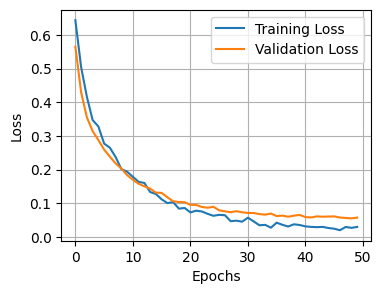

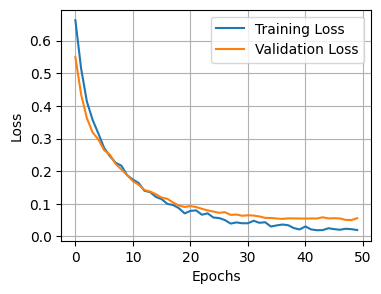

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


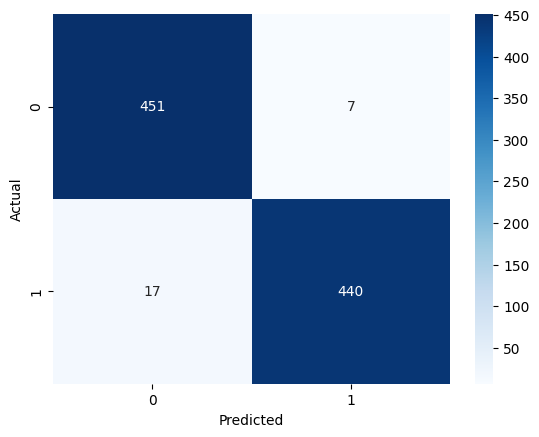

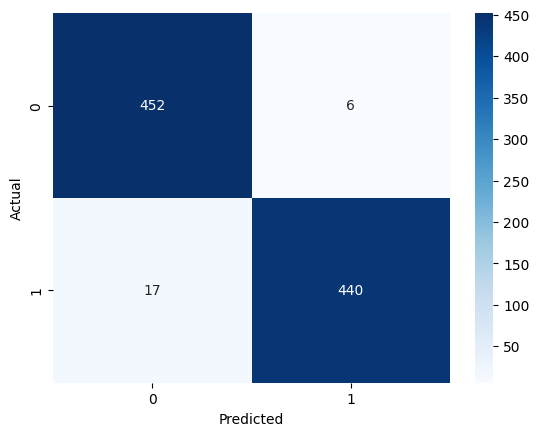

In [91]:
#Confusion Matrix
cm = confusion_matrix(y_test, dl_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

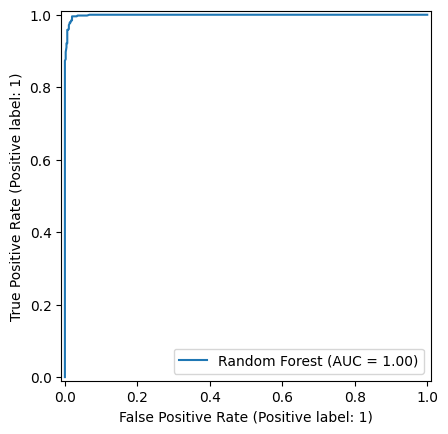

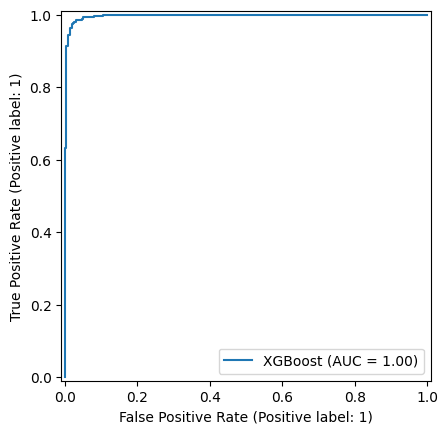

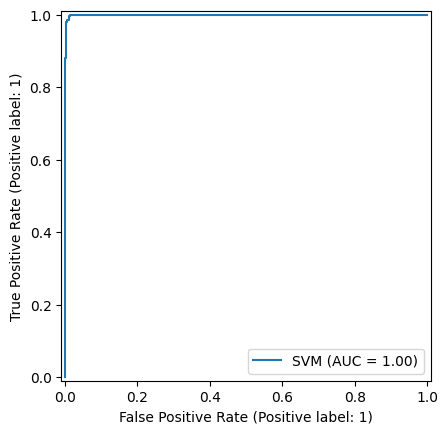

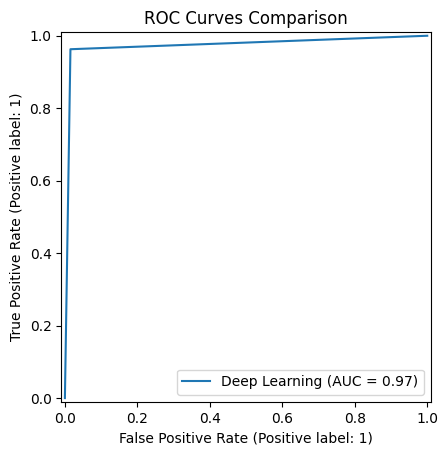

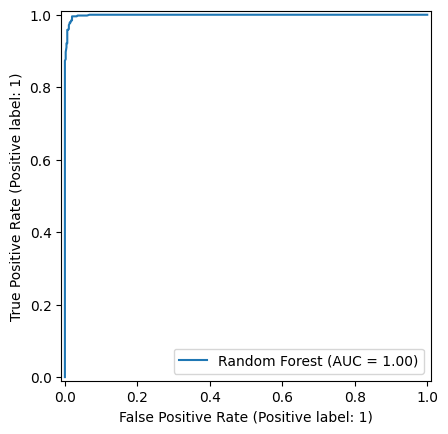

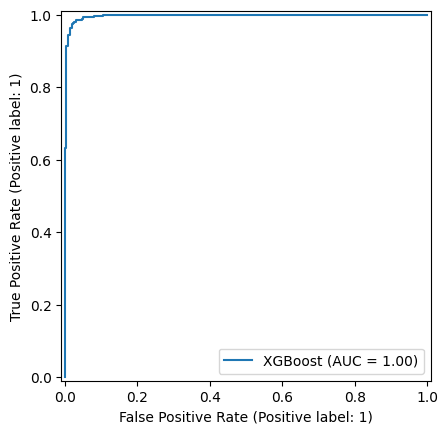

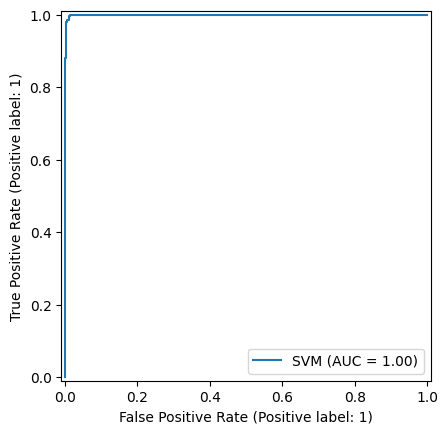

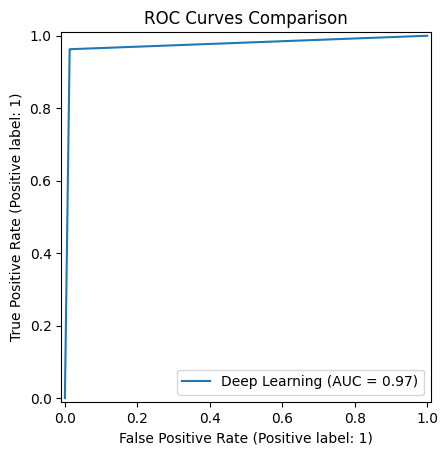

In [92]:
#ROC Curves
for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name)
RocCurveDisplay.from_predictions(y_test, dl_pred, name='Deep Learning')
plt.title("ROC Curves Comparison")
plt.show()

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
def get_learning_curve(model, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        model,
        X,
        y,
        cv=5,
        scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 5),
        n_jobs=-1
    )
    return train_sizes, train_scores.mean(axis=1), val_scores.mean(axis=1)
models = {
    'Random Forest': rf,
    'XGBoost': xgb,
    'SVM': svm
}

ml_results = {}

for name, model in models.items():
    train_sizes, train_acc, val_acc = get_learning_curve(model, X_train, y_train)
    ml_results[name] = (train_sizes, train_acc, val_acc)


In [94]:
dnn_train_acc = history.history['accuracy']
dnn_val_acc = history.history['val_accuracy']
epochs = range(1, len(dnn_train_acc) + 1)


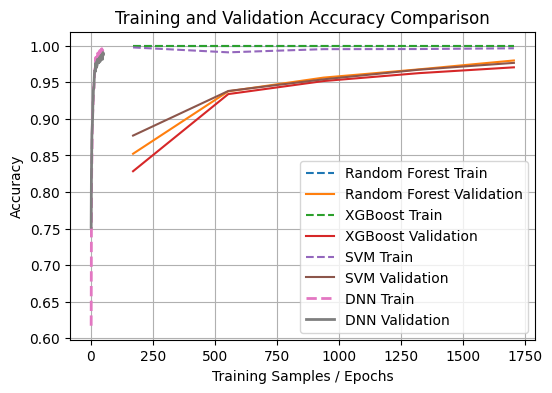

In [95]:
plt.figure(figsize=(6, 4))

# Classical ML models
for name, (train_sizes, train_acc, val_acc) in ml_results.items():
    plt.plot(train_sizes, train_acc, linestyle='--', label=f'{name} Train')
    plt.plot(train_sizes, val_acc, label=f'{name} Validation')

# DNN
plt.plot(epochs, dnn_train_acc, linestyle='--', linewidth=2, label='DNN Train')
plt.plot(epochs, dnn_val_acc, linewidth=2, label='DNN Validation')

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Training Samples / Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


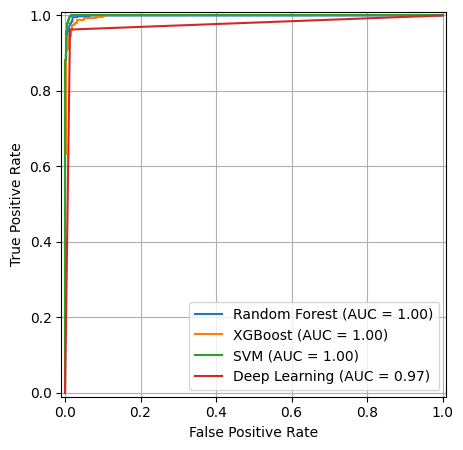

In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Create a single figure
plt.figure(figsize=(7, 5))

# Plot ROC curves for classical ML models
for name, model in models.items():
    RocCurveDisplay.from_estimator(
        model,
        X_test,
        y_test,
        name=name,
        ax=plt.gca()
    )

# Plot ROC curve for Deep Learning model
RocCurveDisplay.from_predictions(
    y_test,
    dl_pred,           # predicted probabilities from DNN
    name="Deep Learning",
    ax=plt.gca()
)

# Plot formatting
#plt.title("ROC Curves Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)

plt.show()


In [97]:
import joblib

# Save classical models
joblib.dump(rf, '/content/drive/MyDrive/AI/Tugas 2/rf_model.pkl')
joblib.dump(xgb, '/content/drive/MyDrive/AI/Tugas 2/xgb_model.pkl')
joblib.dump(svm, '/content/drive/MyDrive/AI/Tugas 2/svm_model.pkl')

# Save deep learning model
dnn_model.save('/content/drive/MyDrive/AI/Tugas 2/dnn_model.h5')

print("✅ All models saved successfully to Google Drive.")


✅ All models saved successfully to Google Drive.


# Task
Generate and visualize confusion matrices for the trained classical machine learning models (Random Forest, XGBoost, and SVM) by iterating through them, making predictions on the test set, calculating the confusion matrix, and then displaying it as a seaborn heatmap.

## Generate Confusion Matrices

### Subtask:
Iterate through the trained classical ML models (Random Forest, XGBoost, SVM), make predictions on the test set, calculate the confusion matrix for each, and then visualize them using seaborn heatmaps.
